In [35]:
from matplotlib import pyplot as plt
import numpy as np
import analysisFunctions as aF
from scipy import signal
from scipy.ndimage import gaussian_filter, median_filter
import seaborn as sns
import cmcrameri.cm as cmc
cmap = 'cmc.batlow'

## Opening and sorting data

In [4]:
pathBase = r"C:\Users\gabri\Desktop\testAnalyse\csv"

violet = np.loadtxt(pathBase + "\\405.csv", skiprows=1, delimiter=',')
violet = violet[:,1]
blue = np.loadtxt(pathBase + "\\470.csv", skiprows=1, delimiter=',')
blue = blue[:,1]
green = np.loadtxt(pathBase + "\\530.csv", skiprows=1, delimiter=',')
green = green[:,1]
red = np.loadtxt(pathBase + "\\625.csv", skiprows=1, delimiter=',')
red = red[:,1]

FPS = 40/5
endTime = (1/FPS) * violet.shape[0]
timestamp = np.linspace(0, int(endTime), int(violet.shape[0]))


## Plotting raw data

Text(0, 0.5, 'normalized intensity signal (-)')

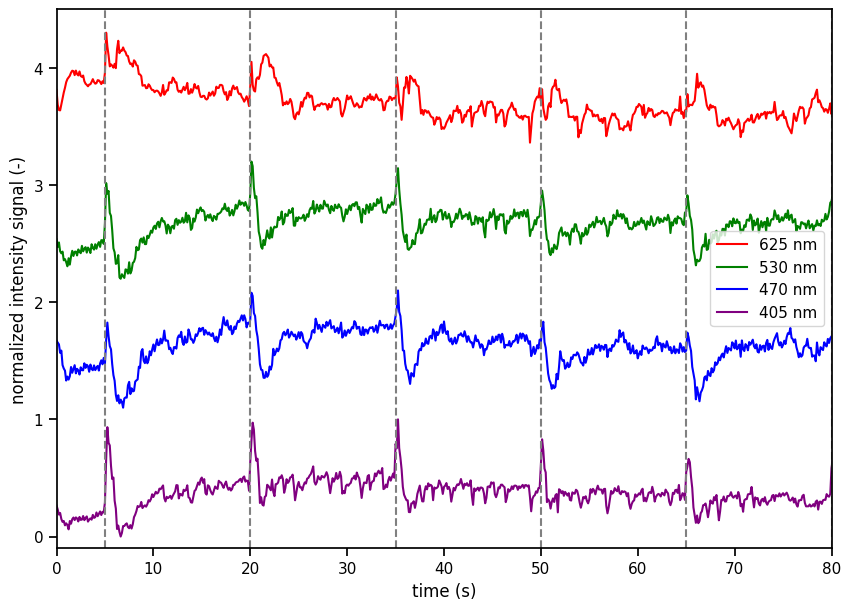

In [5]:
# fig = plt.figure(figsize=(10, 7))
sns.set_context('notebook')


mod_violet = aF.normalizeData(violet, dim=1)
mod_blue = aF.normalizeData(blue, dim=1)
mod_green = aF.normalizeData(green, dim=1)
mod_red = aF.normalizeData(red, dim=1)

AP = np.array(list(range(11))) * 15 + 5

fig = plt.figure(figsize=(10, 7))
plt.plot(timestamp, mod_red+3.3, color='red', label='625 nm')
plt.plot(timestamp, mod_green+2.2, color='green', label='530 nm')
plt.plot(timestamp, mod_blue+1.1, color='blue', label='470 nm')
plt.plot(timestamp, mod_violet, color='purple', label='405 nm')
plt.vlines(AP, -0.1, 4.5, color='grey', linestyles='--')


plt.legend()
plt.ylim(-0.1, 4.5)
plt.xlim(0, 80)
# plt.xlim(0, 40)
plt.xlabel("time (s)")
plt.ylabel("normalized intensity signal (-)")
# ax = plt.gca()
# ax.set_yticklabels([])
# ax.set_yticks([])
# sns.despine()
# plt.savefig("raw_signal_zoom.png", dpi=600)



## Comparaison bleu, vert et mauve

C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\294116284.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(timestamp, (mod_blue/mod_green)+2.6, color='springgreen', label='hemodynamic correction b/g')
C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\294116284.py:11: RuntimeWarning: divide by zero encountered in divide
  plt.plot(timestamp,  (mod_blue/mod_violet)+4.4, color='indigo', label='hemodynamic correction b/v')


[]

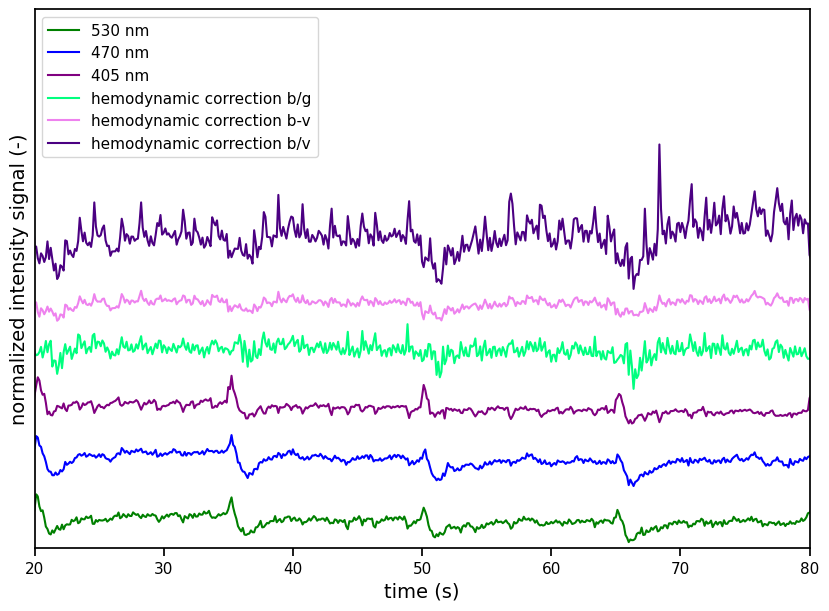

In [6]:
# import seaborn as sns
fig = plt.figure(figsize=(10, 7))
sns.set_context('notebook')

plt.plot(timestamp, mod_green, color='green', label='530 nm')
plt.plot(timestamp, mod_blue+1.1, color='blue', label='470 nm')
plt.plot(timestamp, mod_violet+2.2, color='purple', label='405 nm')

plt.plot(timestamp, (mod_blue/mod_green)+2.6, color='springgreen', label='hemodynamic correction b/g')
plt.plot(timestamp, (mod_blue-mod_violet)+4.4, color='violet', label='hemodynamic correction b-v')
plt.plot(timestamp,  (mod_blue/mod_violet)+4.4, color='indigo', label='hemodynamic correction b/v')


plt.legend()
plt.ylim(0, 10)
plt.xlim(20, 80)
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("normalized intensity signal (-)", fontsize=14)
ax = plt.gca()
ax.set_yticklabels([])
ax.set_yticks([])
# plt.savefig("hemodynamic_correction_tries.png", dpi=600)

## Filtering

C:\Users\gabri\AppData\Local\Temp\ipykernel_18084\3760518613.py:1: RuntimeWarning: divide by zero encountered in divide
  hemo_corr = mod_blue/mod_green


(0.0, 4.0)

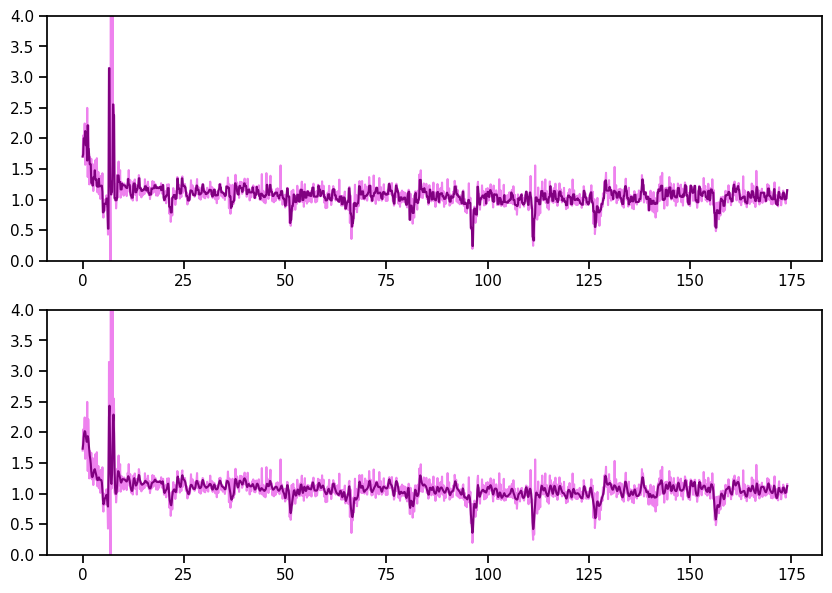

In [7]:
hemo_corr = mod_blue/mod_green

# sos = signal.butter(4, 0.05, btype='high', output='sos', fs=40)
# f_hemo_corr = signal.sosfilt(sos, hemo_corr)

fm_hemo_corr = median_filter(hemo_corr, size=3)
fg_hemo_corr = gaussian_filter(fm_hemo_corr, sigma=1)


fig = plt.figure(figsize=(10, 7))

ax1 = plt.subplot(2, 1, 1)
plt.plot(timestamp, hemo_corr, color='violet', label='530 nm')
plt.plot(timestamp, fm_hemo_corr, color='purple')
# plt.plot(timestamp, mod_red, color='red', label='625 nm')
plt.ylim(0, 4)

ax2 = plt.subplot(2, 1, 2)
# plt.plot(timestamp, green, color='green', label='530 nm')
# plt.plot(timestamp, red, color='red', label='625 nm')
plt.plot(timestamp, hemo_corr, color='violet', label='530 nm')
plt.plot(timestamp, fg_hemo_corr, color='purple')
plt.ylim(0, 4)
# plt.plot(timestamp, f_green)

## Réflectance

c:\Users\gabri\Documents\Université\Maitrise\Projet\Widefield-Imaging-Acquisition\analysisPipeline\analysisFunctions.py:142: RuntimeWarning: divide by zero encountered in log
  mu = (-1/X)* np.log(intensity/iniIntens)


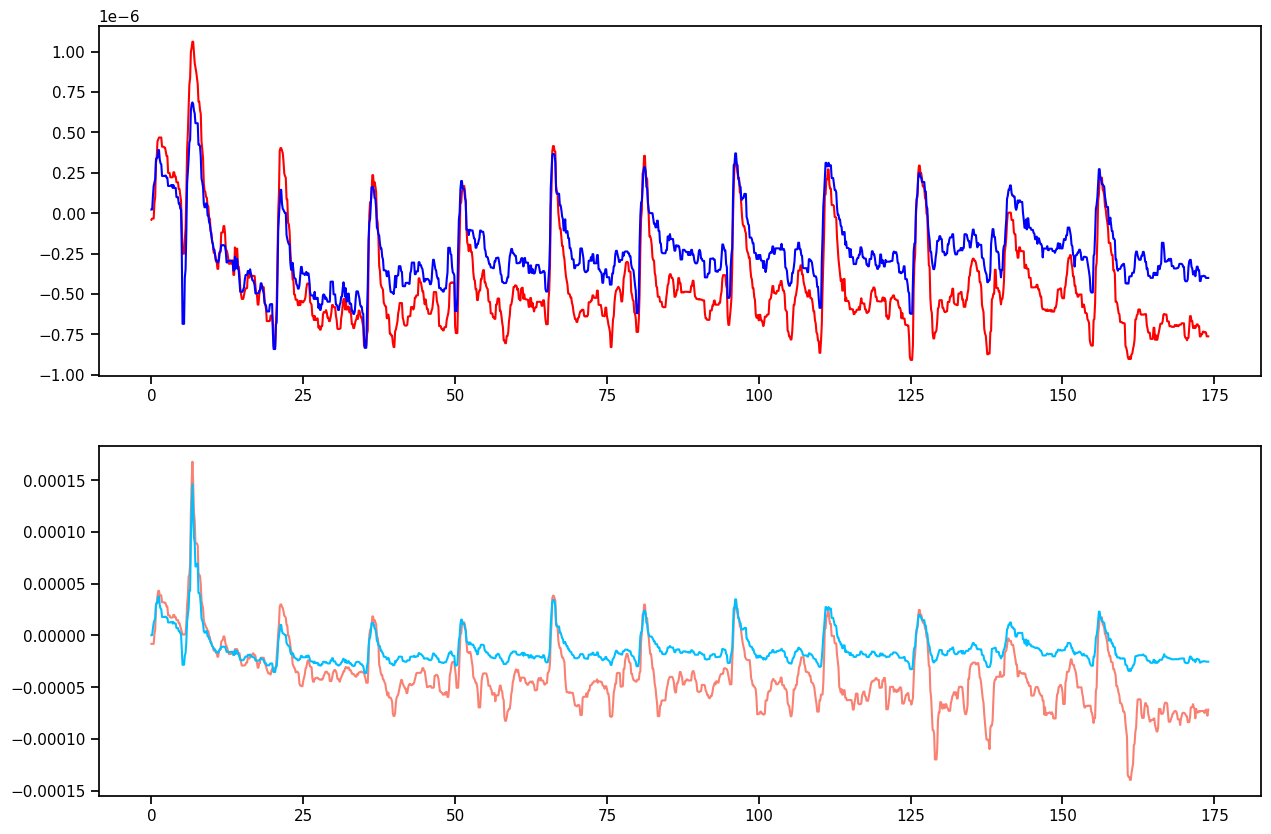

In [8]:
# %matplotlib qt 
%matplotlib inline
m_HbR, m_HbO = aF.oxygenation(mod_red, mod_green, dim=1)
HbR, HbO = aF.oxygenation(red, green, dim=1)

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(timestamp, median_filter(HbO, size=5), 'r')
ax1.plot(timestamp, median_filter(HbR, size=5), 'b')

# plt.plot(timestamp, mod_green, color='green', label='530 nm')
# plt.plot(timestamp, mod_red, color='red', label='625 nm')
# plt.xlim(60, 65)

fm_HbO = median_filter(m_HbO, size=5)
fm_HbR = median_filter(m_HbR, size=5)

ax2 = plt.subplot(2, 1, 2)
# ax2.plot(timestamp, m_HbO, 'r')
# ax2.plot(timestamp, m_HbR, 'b')
ax2.plot(timestamp, fm_HbO, color="salmon")
ax2.plot(timestamp, fm_HbR, color="deepskyblue")

# plt.xlim(20, 25)
# print(m_HbO)


## Raster plot raw data

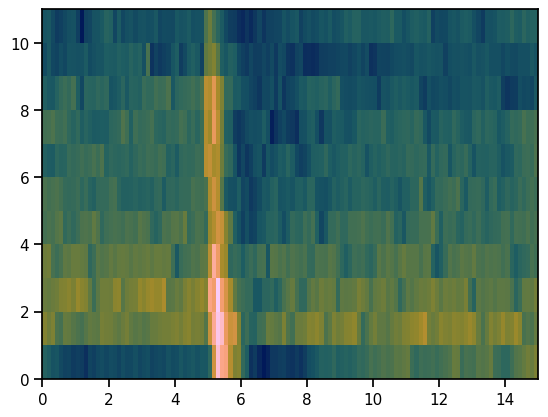

In [69]:
FPS = 40/5
percycle = 15
framespcycles = int(FPS*percycle)
ncycles = int(len(timestamp)//framespcycles)
nframes = int(framespcycles*ncycles)

dx, dy = 1/FPS, 1
y, x = np.mgrid[slice(0, ncycles + dy, dy),
                slice(0, percycle + dx, dx)]

# ras_timestamp = timestamp[:nframes].reshape(ncycles, framespcycles)
ras_violet = mod_violet[:nframes].reshape(ncycles, framespcycles)
ras_blue = mod_blue[:nframes].reshape(ncycles, framespcycles)
ras_green = mod_green[:nframes].reshape(ncycles, framespcycles)
ras_red = mod_red[:nframes].reshape(ncycles, framespcycles)

plt.pcolormesh(x, y, ras_violet, cmap=cmap)
plt.show()

